In [1]:
import sqlite3
import pandas as pd

# Reconnect
options_conn = sqlite3.connect('../sql-database/options_data.db')
stocks_conn = sqlite3.connect('../sql-database/stocks_data.db')

In [145]:
import sqlite3

conn = sqlite3.connect('../sql-database/options_data.db')
cursor = conn.cursor()

# Use PRAGMA table_info to get table schema
cursor.execute("PRAGMA table_info(options)")
table_info = cursor.fetchall()

# Print the table schema
print(table_info)

# Close the connection
conn.close()

[(0, 'contract', 'TEXT', 0, None, 0), (1, 'underlying', 'TEXT', 0, None, 0), (2, 'expiration', 'TEXT', 0, None, 0), (3, 'type', 'TEXT', 0, None, 0), (4, 'strike', 'REAL', 0, None, 0), (5, 'style', 'TEXT', 0, None, 0), (6, 'bid', 'REAL', 0, None, 0), (7, 'bid_size', 'INTEGER', 0, None, 0), (8, 'ask', 'REAL', 0, None, 0), (9, 'ask_size', 'INTEGER', 0, None, 0), (10, 'volume', 'INTEGER', 0, None, 0), (11, 'open_interest', 'INTEGER', 0, None, 0), (12, 'quote_date', 'TEXT', 0, None, 0), (13, 'delta', 'REAL', 0, None, 0), (14, 'gamma', 'REAL', 0, None, 0), (15, 'theta', 'REAL', 0, None, 0), (16, 'vega', 'REAL', 0, None, 0), (17, 'implied_volatility', 'REAL', 0, None, 0)]


In [3]:
sql ="""
SELECT * FROM stocks
limit 10;
"""

print(pd.read_sql(sql, stocks_conn))

  symbol        open        high         low       close    volume  \
0      A   42.450000   42.759999   41.630001   41.650000   6163900   
1     AA    8.499991    8.539991    8.449991    8.449991   2967700   
2   AACC    6.490000    6.505000    6.460000    6.470000    598100   
3  AAMRQ    4.290000    4.470000    4.280000    4.380000  12506800   
4    AAN   28.660000   28.780001   28.160000   28.350000    319900   
5   AAON   27.069997   27.510008   26.939991   27.139994    231500   
6    AAP   79.910004   80.720001   79.849998   80.029999    616300   
7   AAPL  450.220024  457.979988  450.100021  452.729988  95813900   
8    AAT   31.840000   32.230000   31.840000   31.910000     98400   
9    AAU    2.160000    2.330000    2.130000    2.320000    147300   

  adjust_close  quote_date  
0         None  2013-03-21  
1         None  2013-03-21  
2         None  2013-03-21  
3         None  2013-03-21  
4         None  2013-03-21  
5         None  2013-03-21  
6         None  2013-03-21

In [9]:
sql ="""
SELECT * FROM options
where expiration > '2014-04-20'
limit 10;
"""

print(pd.read_sql(sql, options_conn))

           contract underlying  expiration  type  strike style    bid  \
0  A150117C00020000          A  2015-01-17  call    20.0     A  19.85   
1  A150117P00020000          A  2015-01-17   put    20.0     A   0.57   
2  A150117C00023000          A  2015-01-17  call    23.0     A  18.10   
3  A150117P00023000          A  2015-01-17   put    23.0     A   0.90   
4  A150117C00025000          A  2015-01-17  call    25.0     A  16.60   
5  A150117P00025000          A  2015-01-17   put    25.0     A   1.20   
6  A150117C00028000          A  2015-01-17  call    28.0     A  14.75   
7  A150117P00028000          A  2015-01-17   put    28.0     A   1.73   
8  A150117C00030000          A  2015-01-17  call    30.0     A  13.45   
9  A150117P00030000          A  2015-01-17   put    30.0     A   2.17   

  bid_size    ask ask_size  volume  open_interest  quote_date   delta   gamma  \
0     None  22.45     None       0              0  2013-03-27  0.9516  0.0037   
1     None   0.69     None       0

In [10]:
import sqlite3
import pandas as pd

# 1. Open connection
conn = sqlite3.connect('../sql-database/options_data.db')
cur = conn.cursor()

# 2. Overwrite days_to_expiry (years → days)
cur.execute("""
    UPDATE bs_models
       SET days_to_expiry = days_to_expiry * 365
""")
conn.commit()

# 3. (Optional) Verify the change on a few rows
df = pd.read_sql(
    "SELECT quote_date, expiration, days_to_expiry FROM bs_models LIMIT 5",
    conn,
    parse_dates=['quote_date','expiration']
)
print(df)

# 4. Close connection
conn.close()


  quote_date expiration  days_to_expiry
0 2013-03-27 2013-04-20            24.0
1 2013-03-27 2013-04-20            24.0
2 2013-03-27 2013-04-20            24.0
3 2013-03-27 2013-04-20            24.0
4 2013-03-27 2013-04-20            24.0


In [13]:
sql ="""
SELECT * FROM bs_models
where is_sp500 = 1
and days_to_expiry <  7
and days_to_expiry > 1
limit 30;
"""

print(pd.read_sql(sql, options_conn))

               contract underlying           expiration  type  strike style  \
0   AAPL130308C00360000       AAPL  2013-03-08 00:00:00  call   360.0     A   
1   AAPL130308P00360000       AAPL  2013-03-08 00:00:00   put   360.0     A   
2   AAPL130308C00365000       AAPL  2013-03-08 00:00:00  call   365.0     A   
3   AAPL130308P00365000       AAPL  2013-03-08 00:00:00   put   365.0     A   
4   AAPL130308C00370000       AAPL  2013-03-08 00:00:00  call   370.0     A   
5   AAPL130308P00370000       AAPL  2013-03-08 00:00:00   put   370.0     A   
6   AAPL130308C00375000       AAPL  2013-03-08 00:00:00  call   375.0     A   
7   AAPL130308P00375000       AAPL  2013-03-08 00:00:00   put   375.0     A   
8   AAPL130308C00380000       AAPL  2013-03-08 00:00:00  call   380.0     A   
9   AAPL130308P00380000       AAPL  2013-03-08 00:00:00   put   380.0     A   
10  AAPL130308C00385000       AAPL  2013-03-08 00:00:00  call   385.0     A   
11  AAPL130308P00385000       AAPL  2013-03-08 00:00

In [20]:
# Contracts that are created Monday and expire on Friday
sql ="""
SELECT count(*) FROM bs_models
where is_sp500 = 1
and day_of_week = 0
and days_to_expiry = 4
"""

print(pd.read_sql(sql, options_conn))

   count(*)
0     62922


In [2]:
# Contracts that are created Monday and expire on Friday
sql ="""
SELECT * FROM bs_scores
limit 10;
"""

print(pd.read_sql(sql, options_conn))

           contract underlying           quote_date           expiration  \
0  A130420C00034000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
1  A130420P00034000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
2  A130420C00035000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
3  A130420P00035000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
4  A130420C00036000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
5  A130420P00036000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
6  A130420C00037000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
7  A130420P00037000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
8  A130420C00038000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   
9  A130420P00038000          A  2013-03-27 00:00:00  2013-04-20 00:00:00   

   type  strike  mid_price      bs_price  price_diff  
0  call    34.0      7.975  8.112349e+00   -0.137349  
1   put    34.0      0.035  5.253138e-07    0.034999 

In [43]:
# Look up the rolling average values in stocks table (rolling average set on standard deviation of the last 20 days
# python sigma_generator.py --lookback 20 --db ../sql-database/stocks_data.db <- ran this and the output went to a table 

sql = """
Select * from sigma_lbk20 group by quote_date 
limit 30
"""

print(pd.read_sql(sql, stocks_conn))

   symbol           quote_date     sigma
0       A  2013-01-31 00:00:00  0.173684
1       A  2013-02-01 00:00:00  0.175983
2       A  2013-02-04 00:00:00  0.189059
3       A  2013-02-05 00:00:00  0.193163
4       A  2013-02-06 00:00:00  0.188919
5       A  2013-02-07 00:00:00  0.167581
6       A  2013-02-08 00:00:00  0.166341
7       A  2013-02-11 00:00:00  0.170233
8       A  2013-02-12 00:00:00  0.170207
9       A  2013-02-13 00:00:00  0.167501
10      A  2013-02-14 00:00:00  0.167224
11      A  2013-02-15 00:00:00  0.243754
12      A  2013-02-19 00:00:00  0.252233
13      A  2013-02-20 00:00:00  0.254498
14      A  2013-02-21 00:00:00  0.257406
15      A  2013-02-22 00:00:00  0.255486
16      A  2013-02-25 00:00:00  0.248860
17      A  2013-02-26 00:00:00  0.248991
18      A  2013-02-27 00:00:00  0.260577
19      A  2013-02-28 00:00:00  0.260653
20      A  2013-03-01 00:00:00  0.262153
21      A  2013-03-04 00:00:00  0.257435
22      A  2013-03-05 00:00:00  0.255055
23      A  2013-

In [10]:
sql ="""
SELECT * FROM stocks
where quote_date = '2013-03-'
limit 30
"""

print(pd.read_sql(sql, stocks_conn))

Empty DataFrame
Columns: [symbol, open, high, low, close, volume, adjust_close, quote_date]
Index: []


In [51]:
sql ="""
Select close, quote_date
from stocks
where symbol = 'A'
group by quote_date
limit 20;
"""

print(pd.read_sql(sql, stocks_conn))

        close  quote_date
0   41.879999  2013-01-02
1   42.029999  2013-01-03
2   42.860000  2013-01-04
3   42.550001  2013-01-07
4   42.209999  2013-01-08
5   43.349999  2013-01-09
6   43.670000  2013-01-10
7   43.430001  2013-01-11
8   43.539999  2013-01-14
9   43.239999  2013-01-15
10  43.050000  2013-01-16
11  43.869999  2013-01-17
12  44.150000  2013-01-18
13  44.639999  2013-01-22
14  44.300000  2013-01-23
15  44.660000  2013-01-24
16  45.290003  2013-01-25
17  45.180000  2013-01-28
18  44.639999  2013-01-29
19  44.400000  2013-01-30


In [50]:
sql ="""
Select close
from stocks
where symbol = 'A'
group by quote_date
limit 20;
"""

print(pd.read_sql(sql, stocks_conn))

        close
0   41.879999
1   42.029999
2   42.860000
3   42.550001
4   42.209999
5   43.349999
6   43.670000
7   43.430001
8   43.539999
9   43.239999
10  43.050000
11  43.869999
12  44.150000
13  44.639999
14  44.300000
15  44.660000
16  45.290003
17  45.180000
18  44.639999
19  44.400000


In [52]:
0   41.879999
1   42.029999
2   42.860000
3   42.550001
4   42.209999
5   43.349999
6   43.670000
7   43.430001
8   43.539999
9   43.239999
10  43.050000
11  43.869999
12  44.150000
13  44.639999
14  44.300000
15  44.660000
16  45.290003
17  45.180000
18  44.639999
19  44.400000

SyntaxError: invalid syntax (3430562750.py, line 1)

In [53]:
# import sqlite3, pandas as pd, shutil, os, datetime as dt

# # --- CONFIGURE THESE PATHS IF NEEDED ------------------------------------
# DB_PATH   = "../sql-database/stocks_data.db"   # location of your SQLite DB
# TABLE     = "stocks"                           # the table with duplicates
# DUP_KEYS  = ["symbol", "quote_date"]           # columns that define a duplicate row
# # ------------------------------------------------------------------------

# # 1)  create a dated backup of the original table (safety first!)
# backup_db = f"{DB_PATH}.bak_{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}"
# shutil.copyfile(DB_PATH, backup_db)
# print(f"✅ Backup written to {backup_db}")

# with sqlite3.connect(DB_PATH) as con:
#     # 2) load the table into a DataFrame
#     df = pd.read_sql(f"SELECT * FROM {TABLE}", con)
#     before = len(df)
    
#     # 3) drop duplicate rows — keep the first occurrence
#     df_clean = df.drop_duplicates(subset=DUP_KEYS, keep="first")
#     after = len(df_clean)
    
#     # 4) replace the table with the cleaned data
#     df_clean.to_sql(TABLE, con, if_exists="replace", index=False, method="multi", chunksize=300)

# print(f"Removed {before - after} duplicate rows; {after} rows remain in '{TABLE}'.")


In [87]:
sql = """
SELECT *
FROM bs_put_20d 

limit 30
""" 
print(pd.read_sql(sql, options_conn))

               contract underlying           quote_date           expiration  \
0   AAPL130405P00320000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
1   AAPL130405P00325000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
2   AAPL130405P00330000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
3   AAPL130405P00335000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
4   AAPL130405P00340000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
5   AAPL130405P00345000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
6   AAPL130405P00350000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
7   AAPL130405P00355000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
8   AAPL130405P00360000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
9   AAPL130405P00370000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
10  AAPL130405P00380000       AAPL  2013-03-27 00:00:00  2013-04-05 00:00:00   
11  AAPL130405P00390000       AAPL  2013

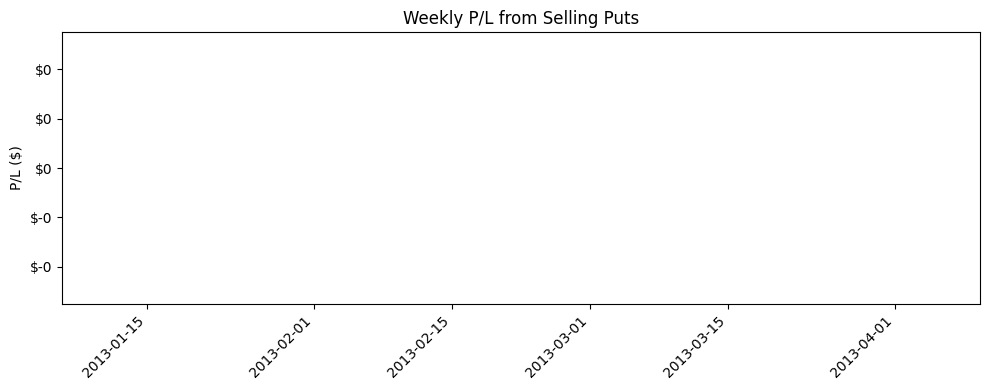

         week  pnl top_symbol  top_symbol_pnl
0  2013-01-11    0                          0
1  2013-01-18    0                          0
2  2013-01-25    0                          0
3  2013-02-01    0                          0
4  2013-02-08    0                          0


In [68]:
import importlib, weekly_put_backtester as wpb
importlib.reload(wpb)

curve, weekly, trades, fig = wpb.run_backtest(
    capital=500_000,
    reinvest=False,
    months=3,
    num_picks=10,
    start_date="2013-01-07",
    options_table="bs_put_20d",
    plot=True,
)
print(weekly.head())


         week  total_pnl  equity
0  2013-01-07        0.0  500000
1  2013-01-14        0.0  500000
2  2013-01-21        0.0  500000
3  2013-01-28        0.0  500000
4  2013-02-04        0.0  500000
Empty DataFrame
Columns: []
Index: []


/var/folders/zy/dkdzp0_n5yqc4q3hm17_9htm0000gn/T/ipykernel_58440/2702755395.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


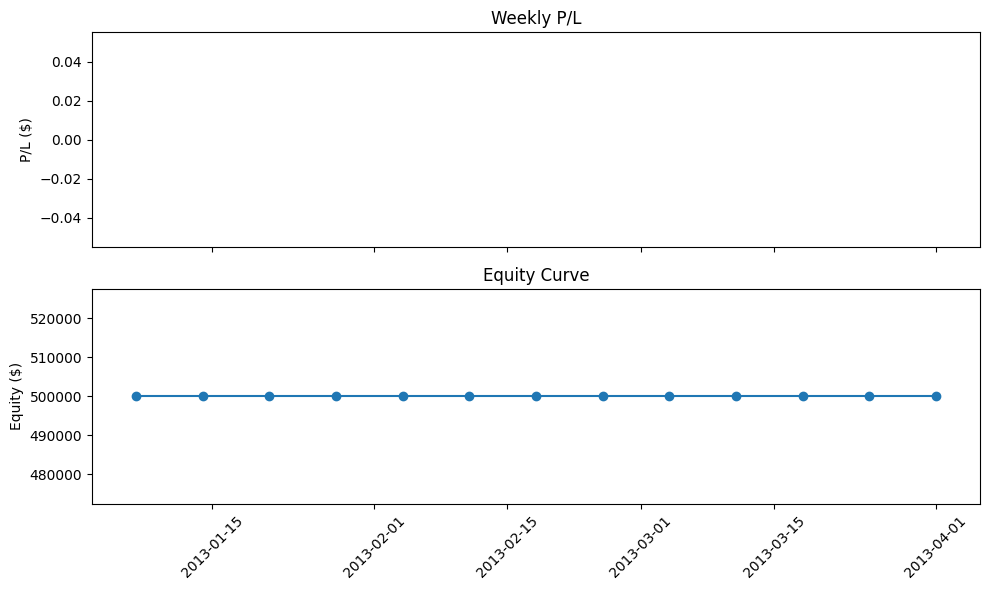

In [96]:
import importlib, weekly_put_backtester as wpb
importlib.reload(wpb)

summary_df, picks_df, fig = wpb.run_backtest(
    capital=500_000,
    reinvest=True,
    months=3,
    num_picks=10,
    start_date="2013-01-07",
    options_db="../sql-database/options_data.db",
    options_table="bs_put_20d",
    sp500_file="../sql-database/sp500_symbols.txt",
    plot=True,
)
print(summary_df.head())
print(picks_df.head())
fig.show()


In [109]:
sql = """
SELECT *
FROM weekly_put_rank
where week_start = '2012-12-31 00:00:00'
ORDER BY week_start, avg_bid DESC
limit 60
;
"""
print(pd.read_sql(sql, options_conn))

             week_start underlying   avg_bid avg_edge    avg_open   avg_close  \
0   2012-12-31 00:00:00       AAPL  0.267360     None  526.999992  520.300026   
1   2012-12-31 00:00:00        CMG  0.211300     None  300.179993  300.000000   
2   2012-12-31 00:00:00       AMZN  0.194714     None  259.149994  267.940002   
3   2012-12-31 00:00:00         MA  0.187329     None  510.979996  528.680000   
4   2012-12-31 00:00:00         CF  0.183340     None  210.879993  218.169994   
5   2012-12-31 00:00:00        IBM  0.146670     None  193.990005  194.449997   
6   2012-12-31 00:00:00      GOOGL  0.117907     None  737.969980  739.989992   
7   2012-12-31 00:00:00          V  0.104168     None  156.770004  161.160004   
8   2012-12-31 00:00:00        CRM  0.101274     None  169.610001  173.350006   
9   2012-12-31 00:00:00         GS  0.086556     None  134.509995  137.130005   
10  2012-12-31 00:00:00       FFIV  0.084093     None   97.529999   97.889999   
11  2012-12-31 00:00:00     

In [114]:
sql = """
SELECT *
FROM weekly_put_strategy

;
"""
print(pd.read_sql(sql, options_conn))

            week_start underlying  put_stock_price   avg_bid  avg_edge  \
0  2013-02-11 00:00:00         ES              5.0  0.016500  0.016500   
1  2013-03-11 00:00:00         ES              5.0  0.016000  0.016000   
2  2013-04-15 00:00:00         ES              5.0  0.013167  0.013167   
3  2013-05-13 00:00:00         ES              5.0  0.013167  0.013167   

   exp_return  contract_count  contracts_sold  allocation_per_symbol  \
0    0.000401               3             100           50000.000000   
1    0.000377               3             100           50016.500000   
2    0.000300               3             100           50032.500000   
3    0.000303               3             100           50045.666667   

   premium_income  assignment_loss     net_pnl  cash_after_trade  
0      165.000000              0.0  165.000000     500165.000000  
1      160.000000              0.0  160.000000     500325.000000  
2      131.666667              0.0  131.666667     500456.666667  


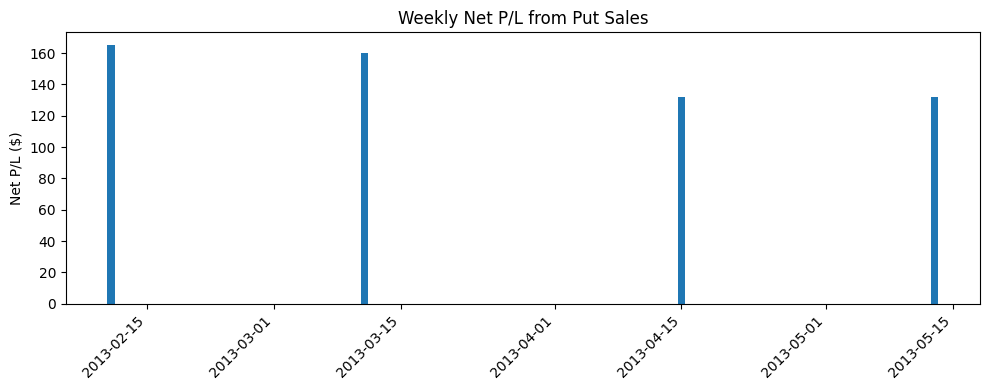

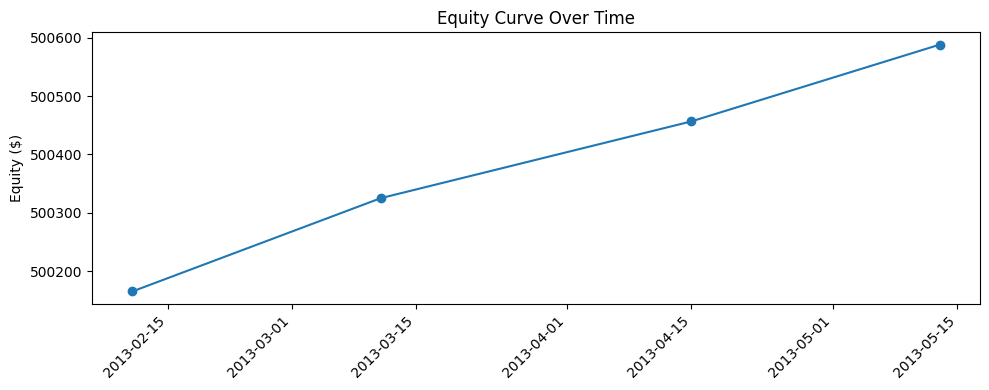

In [117]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load summary data
conn = sqlite3.connect("../sql-database/options_data.db")
summary = pd.read_sql("SELECT week_start, weekly_pnl, equity FROM weekly_put_summary",
                      conn, parse_dates=["week_start"])
conn.close()

# Weekly P/L bar chart
plt.figure(figsize=(10,4))
plt.bar(summary["week_start"], summary["weekly_pnl"])
plt.title("Weekly Net P/L from Put Sales")
plt.ylabel("Net P/L ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Equity curve
plt.figure(figsize=(10,4))
plt.plot(summary["week_start"], summary["equity"], marker="o")
plt.title("Equity Curve Over Time")
plt.ylabel("Equity ($)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [4]:
import sqlite3
import pandas as pd

# 1. Connect to your options DB
#db_path = "/Users/chaitanyapatchava/dev/trading/python/sql-database/options_data.db"
conn = sqlite3.connect('../sql-database/options_data.db')

#conn = sqlite3.connect(db_path)

# 2. Read the strategy table
df = pd.read_sql(
    """
    SELECT
      week_start,
      underlying,
      contracts_sold,
      allocation_per_symbol,
      premium_income,
      assignment_loss,
      net_pnl,
      cash_after_trade
    FROM weekly_put_strategy
    ORDER BY week_start, underlying
    """,
    conn,
    parse_dates=["week_start"],
)

conn.close()

# 3. Display the first few rows
df.head(100)


,week_start,underlying,contracts_sold,allocation_per_symbol,premium_income,assignment_loss,net_pnl,cash_after_trade
0,2013-02-11,ES,100,50000.000000,165.000000,0.0,165.000000,500165.000000
1,2013-03-11,ES,100,50016.500000,160.000000,0.0,160.000000,500325.000000
2,2013-04-15,ES,100,50032.500000,131.666667,0.0,131.666667,500456.666667
3,2013-05-13,ES,100,50045.666667,131.666667,0.0,131.666667,500588.333333


Annualized Return (≈): 15.29%
Annualized Volatility (≈): 0.26%
Sharpe Ratio (≈): 59.01
Max Drawdown: $0.00


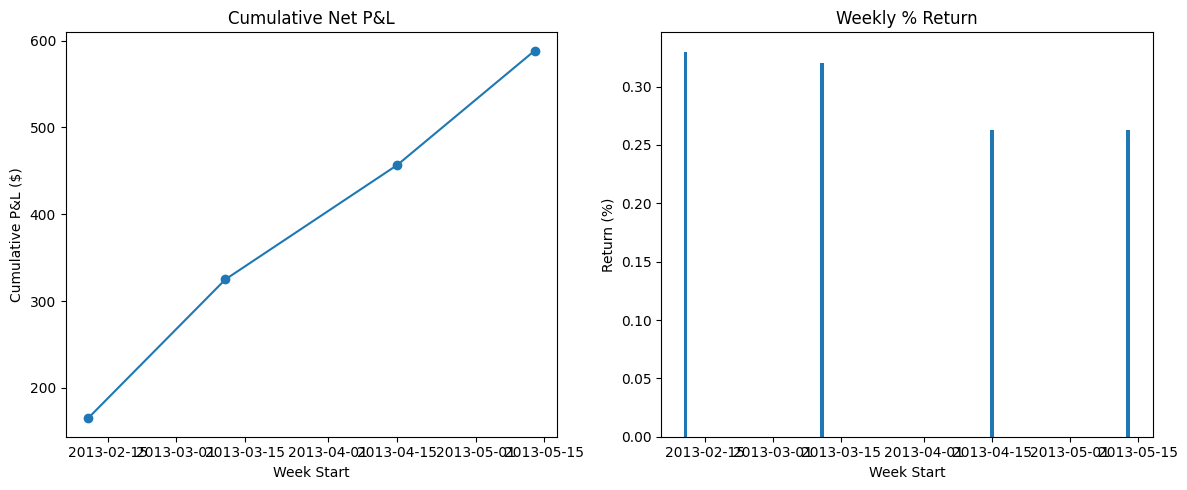

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you’ve already loaded df as above:

# 1. Compute cumulative P&L and cumulative cash
df = df.sort_values('week_start')
df['cum_net_pnl'] = df['net_pnl'].cumsum()
df['cum_cash'] = df['cash_after_trade']  # if this already reflects cumulative

# 2. Weekly returns (on capital at risk)
#    Here we’ll treat allocation_per_symbol as your “notional” each week
df['weekly_return_pct'] = df['net_pnl'] / df['allocation_per_symbol'] * 100

# 3. Performance metrics
annualized_return = df['weekly_return_pct'].mean() * 52  # simple approximation
weekly_vol = df['weekly_return_pct'].std()
sharpe_ratio = annualized_return / (weekly_vol * np.sqrt(52))

# 4. Max drawdown on cumulative P&L
running_max = df['cum_net_pnl'].cummax()
drawdown = df['cum_net_pnl'] - running_max
max_drawdown = drawdown.min()

print(f"Annualized Return (≈): {annualized_return:.2f}%")
print(f"Annualized Volatility (≈): {weekly_vol * np.sqrt(52):.2f}%")
print(f"Sharpe Ratio (≈): {sharpe_ratio:.2f}")
print(f"Max Drawdown: ${max_drawdown:.2f}")

# 5. Plot cumulative P&L and weekly returns
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(df['week_start'], df['cum_net_pnl'], marker='o')
plt.title("Cumulative Net P&L")
plt.xlabel("Week Start")
plt.ylabel("Cumulative P&L ($)")

plt.subplot(1, 2, 2)
plt.bar(df['week_start'], df['weekly_return_pct'])
plt.title("Weekly % Return")
plt.xlabel("Week Start")
plt.ylabel("Return (%)")

plt.tight_layout()
plt.show()


Annualized Return: 15.29%
Annualized Volatility: 0.26%
Sharpe Ratio: 59.01
Max Drawdown: $0.00


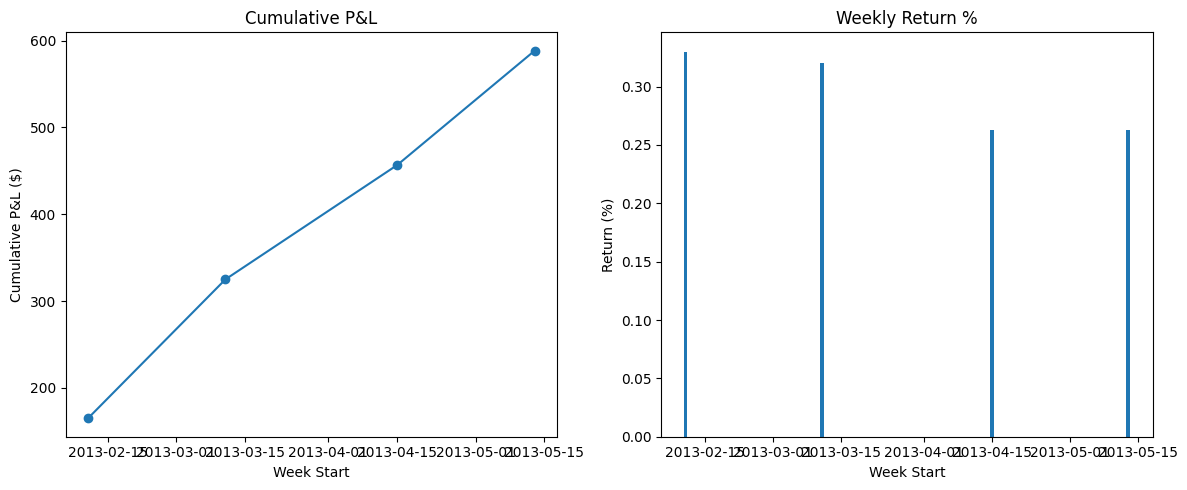

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Ensure it’s sorted by date
df = df.sort_values('week_start').reset_index(drop=True)

# 2. Cumulative P&L
df['cum_net_pnl'] = df['net_pnl'].cumsum()

# 3. Weekly return on risked capital
df['weekly_return_pct'] = df['net_pnl'] / df['allocation_per_symbol'] * 100

# 4. Key metrics
annualized_return = df['weekly_return_pct'].mean() * 52
annualized_vol = df['weekly_return_pct'].std() * np.sqrt(52)
sharpe = annualized_return / annualized_vol
running_max = df['cum_net_pnl'].cummax()
max_drawdown = (df['cum_net_pnl'] - running_max).min()

print(f"Annualized Return: {annualized_return:.2f}%")
print(f"Annualized Volatility: {annualized_vol:.2f}%")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Max Drawdown: ${max_drawdown:.2f}")

# 5. Plot the equity curve and weekly returns
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df['week_start'], df['cum_net_pnl'], marker='o')
plt.title('Cumulative P&L')
plt.xlabel('Week Start')
plt.ylabel('Cumulative P&L ($)')

plt.subplot(1,2,2)
plt.bar(df['week_start'], df['weekly_return_pct'])
plt.title('Weekly Return %')
plt.xlabel('Week Start')
plt.ylabel('Return (%)')

plt.tight_layout()
plt.show()


In [7]:
wins = df[df['net_pnl'] > 0]['net_pnl']
losses = df[df['net_pnl'] <= 0]['net_pnl']
print("Win Rate:", len(wins)/len(df))
print("Avg Win:", wins.mean(), "Avg Loss:", losses.mean())


Win Rate: 1.0
Avg Win: 147.08333333333331 Avg Loss: nan


In [8]:
summary = df.groupby('underlying').agg({
    'net_pnl': ['sum','mean'],
    'weekly_return_pct': ['mean','std'],
    'contracts_sold': 'sum'
})
display(summary)


net_pnl             weekly_return_pct           contracts_sold
                   sum        mean              mean       std            sum
underlying                                                                   
ES          588.333333  147.083333          0.294037  0.035929            400

In [9]:
df.to_csv('weekly_strategy_report.csv', index=False)


In [10]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../sql-database/options_data.db')

# Load only puts and add a week key
df = pd.read_sql("""
    SELECT *,
           strftime('%Y-%W', quote_date) AS iso_week
    FROM bs_scores
    WHERE type = 'put'
""", conn, parse_dates=['quote_date','expiration'])
conn.close()

# For each week, pick the 20 rows with the smallest price_diff
top20 = (
    df
    .sort_values(['iso_week','price_diff'])    # price_diff ascending => most negative first
    .groupby('iso_week')
    .head(20)
    .reset_index(drop=True)
)

# Inspect
top20[['iso_week','contract','underlying','quote_date',
       'expiration','strike','mid_price','bs_price','price_diff']]


,iso_week,contract,underlying,quote_date,expiration,strike,mid_price,bs_price,price_diff
0,2013-00,A130119P00018000,A,2013-01-02,2013-01-19,18.0,0.010,NaN,NaN
1,2013-00,A130119P00019000,A,2013-01-02,2013-01-19,19.0,0.010,NaN,NaN
2,2013-00,A130119P00020000,A,2013-01-02,2013-01-19,20.0,0.015,NaN,NaN
3,2013-00,A130119P00021000,A,2013-01-02,2013-01-19,21.0,0.010,NaN,NaN
4,2013-00,A130119P00022000,A,2013-01-02,2013-01-19,22.0,0.010,NaN,NaN
...,...,...,...,...,...,...,...,...,...
515,2013-25,OEX130628P00740000,OEX,2013-06-27,2013-06-28,740.0,15.650,739.724726,-724.074726
516,2013-25,OEX130628P00735000,OEX,2013-06-27,2013-06-28,735.0,10.700,734.724863,-724.024863
517,2013-25,OEX130628P00730000,OEX,2013-06-27,2013-06-28,730.0,6.100,729.725000,-723.625000
518,2013-25,OEX130705P00765000,OEX,2013-06-27,2013-07-05,765.0,41.250,764.577347,-723.327347
